### カーネル法とは
$d$個の数値を並べた変数$\boldsymbol{x}=(x_1,x_2,\cdots,x_d)^T$と、$y$という変数の組を考え、入力$\boldsymbol{x}$から$y$を出力する関数を推定する問題を考える。
サンプルデータとして,$\boldsymbol{x}$と$y$の組を$n$個持っているとする。
そのうち$i$番目のサンプルの$\boldsymbol{x}$を$\boldsymbol{x}^{(i)}=(x_1^{(i)},x_2^{(i)},\cdots,x_d^{(i)})^T$とし、それに対応する$y$を$y^{(i)}$と書くこととする。
$\boldsymbol{x}$が1次元であれば、2次元平面上の点としてそれぞれのサンプルを描くことができる。

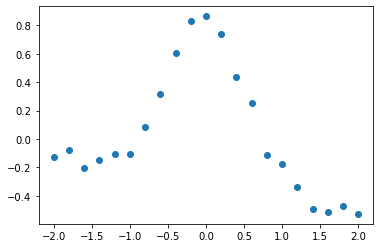

In [131]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x1 = np.arange(-2,2.1,0.2)
y = -0.1*x1-0.4 + norm.pdf(x1*2)*3 + np.random.rand(len(x1))*0.2
plt.plot(x1,y,'o')

#### 基本の線形モデル
基本となる線形モデル
$$
y=\boldsymbol{w}^T\boldsymbol{x}=\sum_{m=1}^dw_mx_m
$$
を考える。
直線からのずれに損失を設定し、その合計ができるだけ小さくなるように直線を求めることにする。
損失として二乗誤差

$$
r_{square}(y,\boldsymbol{x};\boldsymbol{w})=(y-\boldsymbol{w}^T\boldsymbol{x})^2
$$

を取れば、すべてのサンプルに対する総和が

$$
R(\boldsymbol{w})=\sum_{j=1}^nr_{square}(y^{(j)},\boldsymbol{x}^{(j)};\boldsymbol{w})=\sum_{j=1}^n(y^{(j)}-\boldsymbol{w}^T\boldsymbol{x}^{(j)})^2
$$

となり、これを最小にする$\boldsymbol{w}$を見つけることが目標となる。

$$
\boldsymbol{y} = \left(
\begin{array}{c}
y^{(1)} \\
y^{(2)} \\
\vdots  \\
y^{(n)}
\end{array}
\right),\hspace{5mm}
X = \left(
\begin{array}{c}
\boldsymbol{x}^{(1)T} \\
\boldsymbol{x}^{(2)T} \\
\vdots  \\
\boldsymbol{x}^{(n)T}
\end{array}
\right)=
\left(
\begin{array}{ccc}
x_1^{(1)} & \cdots & x_d^{(1)} \\
x_1^{(2)} & \cdots & x_d^{(2)} \\
\vdots & & \vdots \\
x_1^{(n)} & \cdots & x_d^{(n)}
\end{array}
\right)
$$

これを、$\boldsymbol{w}$で微分して$\boldsymbol{0}$となる点を見つければよい。

$$
\frac{\partial R(\boldsymbol{w})}{\partial \boldsymbol{w}} = -2X^T(\boldsymbol{y}-X\boldsymbol{w})=\boldsymbol{0}
$$

となり、$\boldsymbol{w}$について解けば、

$$
\boldsymbol{w}=(X^TX)^{-1}X^T\boldsymbol{y}
$$

が得られる。

In [133]:
X = x1.reshape(len(x1),-1)
y = y.reshape(len(y),-1)

w = np.linalg.inv(X.T@X)@X.T@y
print(w)

[[-0.10117882]]


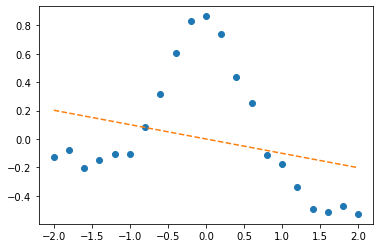

In [134]:
plt.plot(x1,y,'o')
plt.plot(x1,X@w,'--')

#### カーネル法
カーネル関数は2つの入力$\boldsymbol{x}=(x_1,x_2,\cdots,x_d)^T,\boldsymbol{x}'=(x'_1,x'_2,\cdots,x'_d)^T$から計算される関数$k(\boldsymbol{x},\boldsymbol{x}')$である。
ここでは、よく使用される
$$
k(\boldsymbol{x},\boldsymbol{x}')=\exp(-\beta |\boldsymbol{x}-\boldsymbol{x}'|^2)
$$
という関数を使用することにする。
カーネル法では、$\boldsymbol{x}$に対して
$$
y=\sum_{j=1}^n\alpha_jk(\boldsymbol{x}^{(j)},\boldsymbol{x})
$$
という関数を当てはめる。
この場合も線形の場合と同じように二乗誤差
$$
r_k(y,\boldsymbol{x};\boldsymbol{\alpha})=(y-\sum_{j=1}^n\alpha_jk(\boldsymbol{x}^{(j)},\boldsymbol{x}))^2
$$

を最小にするように$\boldsymbol{\alpha}=(\alpha_1,\cdots,\alpha_n)^T$を決めることとする。
ここで、$K_{ij}=k(\boldsymbol{x}^{(j)},\boldsymbol{x}^{(i)})$を$(i,j)$成分とするような行列を

$$
K=\left(
\begin{array}{cccc}
k(\boldsymbol{x}^{(1)},\boldsymbol{x}^{(1)}) & k(\boldsymbol{x}^{(2)},\boldsymbol{x}^{(1)}) & \cdots & k(\boldsymbol{x}^{(n)},\boldsymbol{x}^{(1)}) \\
k(\boldsymbol{x}^{(1)},\boldsymbol{x}^{(2)}) & k(\boldsymbol{x}^{(2)},\boldsymbol{x}^{(2)}) & \cdots & k(\boldsymbol{x}^{(n)},\boldsymbol{x}^{(2)}) \\
\vdots & \vdots & & \vdots \\
k(\boldsymbol{x}^{(1)},\boldsymbol{x}^{(n)}) & k(\boldsymbol{x}^{(2)},\boldsymbol{x}^{(n)}) & \cdots & k(\boldsymbol{x}^{(n)},\boldsymbol{x}^{(n)})
\end{array}
\right)
$$

とおくと、二乗誤差の総和は

$$
R_k(\boldsymbol{\alpha})=\sum_{i=1}^nr_k(y^{(i)},\boldsymbol{x}^{(i)};\boldsymbol{\alpha})=(\boldsymbol{y}-K\boldsymbol{\alpha})^T(\boldsymbol{y}-K\boldsymbol{\alpha})
$$

と書ける。この解は、
$$
\boldsymbol{\alpha}=(K^TK)^{-1}K^T\boldsymbol{y}
$$
となる。
任意の$\boldsymbol{x},\boldsymbol{x}'$に対して$k(\boldsymbol{x},\boldsymbol{x}')=k(\boldsymbol{x}',\boldsymbol{x})$が成り立ち、$K$は対称行列となる。
すなわち$K^T=K$だから、$(K^TK)^{-1}K^T=(K^2)^{-1}K=K^{-1}$となるため、簡単に
$$
\boldsymbol{\alpha}=K^{-1}\boldsymbol{y}
$$
と書ける。

In [114]:
def rbf(x1, x2, beta):
    return np.exp(-beta*((x1-x2).T@(x1-x2)))

def Kernel(x1, x2, kernel, **param):
    return np.array([[kernel(x1=xx1, x2=xx2, **param) for xx2 in x2] for xx1 in x1])

alpha:  [[-2.22522068e+09  2.38220413e+10 -1.29668750e+11  4.77107466e+11
  -1.33068382e+12  2.99007075e+12 -5.61585230e+12  9.02677265e+12
  -1.26102880e+13  1.54603679e+13 -1.67245882e+13  1.59907166e+13
  -1.34889394e+13  9.98397838e+12 -6.42061617e+12  3.53234592e+12
  -1.62356315e+12  6.00866467e+11 -1.68455413e+11  3.19010696e+10
  -3.06927648e+09]]


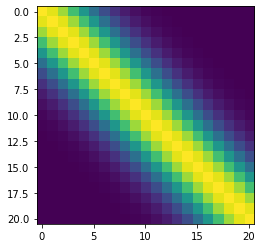

(-1.0, 1.0)

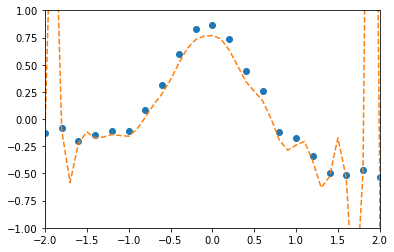

In [166]:
K1 = Kernel(X, X, rbf, beta=1)

alpha1 = (np.linalg.inv(K1)@y).reshape(len(X), -1)
print('alpha: ', alpha1.T)

x2 = np.arange(-2.1,2.2,0.1)
K = Kernel(X, x2, rbf, beta=1)

plt.imshow(K1)
plt.show()

plt.plot(x1, y,'o')
plt.plot(x2, K.T@alpha1,'--')
plt.xlim(-2,2)
plt.ylim(-1,1)

#### 正則化
通常パラメータの次元は最小限に抑えるのが良いとされている。
これに対し、カーネル法では次元は高次元に保ったまま、関数の表現能力を抑える**正則化**という方法を使う。
正則化は、サンプルに対する誤差の他に、たとえば$\boldsymbol{\alpha}^TK\boldsymbol{\alpha}$という2次形式を$\lambda$という正の数で重みづけして加えたものを最小化する。
$$
R_{k,\lambda}(\boldsymbol{\alpha})=(\boldsymbol{y}-K\boldsymbol{\alpha})^T(\boldsymbol{y}-K\boldsymbol{\alpha})+\lambda\boldsymbol{\alpha}^TK\boldsymbol{\alpha},\hspace{5mm} \lambda>0
$$

という関数の最小化を行う。
$\lambda$が非常に小さければ、汎化能力に乏しい不安定な解が得られる。一方、$\lambda$を大きくしていけば、2次形式を最小にする点、すなわち$\boldsymbol{\alpha}=\boldsymbol{0}$という解に近づいていく。これは、サンプルへのあてはめがまったく行われていないので汎化能力はやはり乏しい。
微分して$\boldsymbol{0}$とおけば、
$$
-K(\boldsymbol{y}-K\boldsymbol{\alpha})+\lambda K \boldsymbol{\alpha}=\boldsymbol{0}
$$
となり、ここでも$K$が正則だと仮定すれば
$$
\boldsymbol{\alpha}=(K+\lambda I_n)^{-1}\boldsymbol{y}
$$
という解が得られる。
ここで、正則化のために加えた$\boldsymbol{\alpha}^TK\boldsymbol{\alpha}$を**正則化項**と呼び、その強さを調節している$\lambda$を**正則化パラメータ**と呼ぶ。

(-1.0, 1.0)

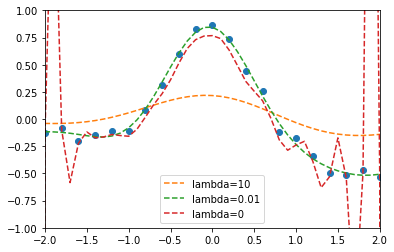

In [167]:
x2 = np.arange(-2.1,2.2,0.1)
K = Kernel(X, x2, rbf, beta=1)

plt.plot(x1, y,'o')

for lmd in [10,0.01,0]:
    alpha2 = (np.linalg.inv(K1 + lmd * np.identity(len(x1)))@y).reshape(len(X), -1)
    plt.plot(x2, K.T@alpha2,'--' ,label='lambda='+str(lmd))

plt.legend()
plt.xlim(-2,2)
plt.ylim(-1,1)